# Business Understanding
## Questions
### What causes high turnover rate in young employees?
### Which department/job role has a high leaving rate?
### What are the factors contributing to employees leaving or staying?

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns #a plotting libary that is built ontop of matplot
import numpy as np
import matplotlib.pyplot as plt #a plotting libary
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

## Gather Data

In [2]:

df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,EMPLOYEE_ID,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [3]:
#the data types are well assigned and there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
EMPLOYEE_ID                 1470 non-null int64
Age                         1470 non-null int64
Turnover                    1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

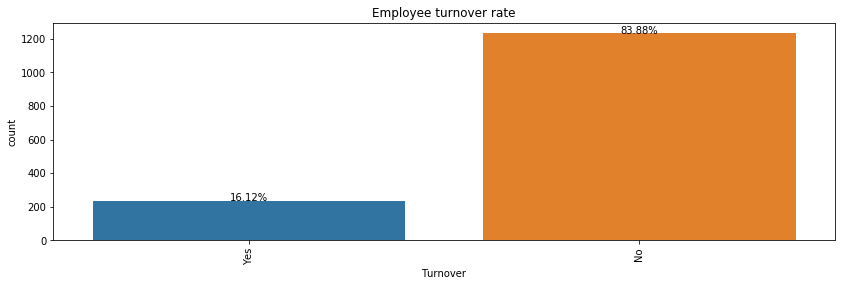

In [4]:
#Check the ratio between people that left and that didn't leave

f, ax = plt.subplots(figsize=(14, 4))
ax = sns.countplot(x="Turnover", data=df)

# Add percentage labels on top of each bar
# Calculate percentages and annotate the bars
total = float(len(df))  # Total number of samples
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format((height / total) * 100), ha="center")
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.title(f'Employee turnover rate')
plt.show()

## Question 1: What causes high turnover rate in young employees?

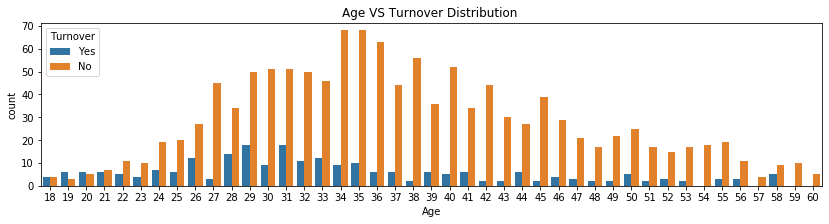

In [5]:
# This is the age distibution of the people that both stayed and left
f, ax = plt.subplots(figsize=(14, 3))
ax = sns.countplot(x="Age", hue="Turnover", data=df)
plt.title(f'Age VS Turnover Distribution ')
plt.show()

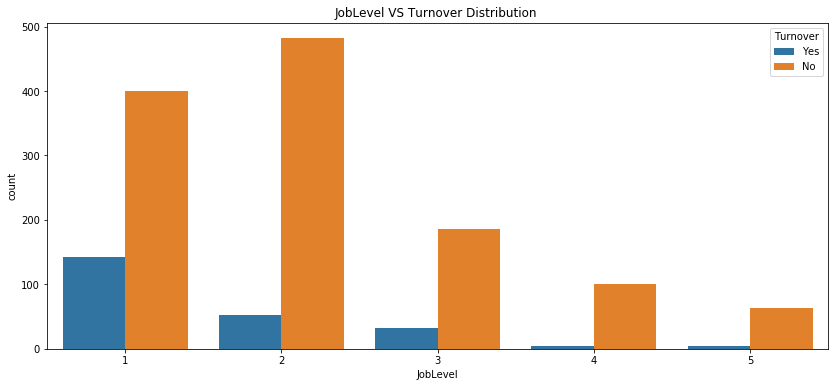

In [6]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="JobLevel", hue="Turnover", data=df)
plt.title(f'JobLevel VS Turnover Distribution ')
plt.show()

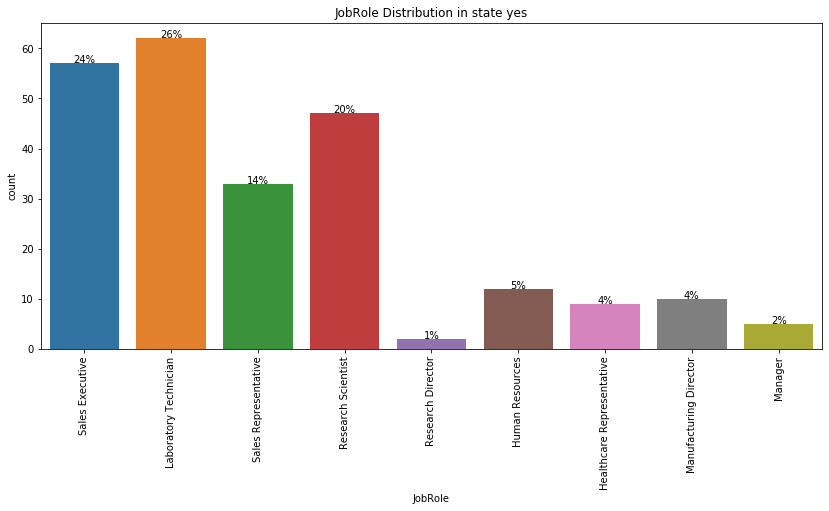

In [7]:
filtered_df = df[(df["Turnover"] == 'Yes')]

if filtered_df.empty:
    print("no")
else:
    f, ax = plt.subplots(figsize=(14, 6))
    ax = sns.countplot(x="JobRole", data=filtered_df)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    total = float(len(filtered_df))  # Total number of samples
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

    plt.title(f'JobRole Distribution in state yes')
    plt.show()

## Question 2: Which department has a high leaving rate?

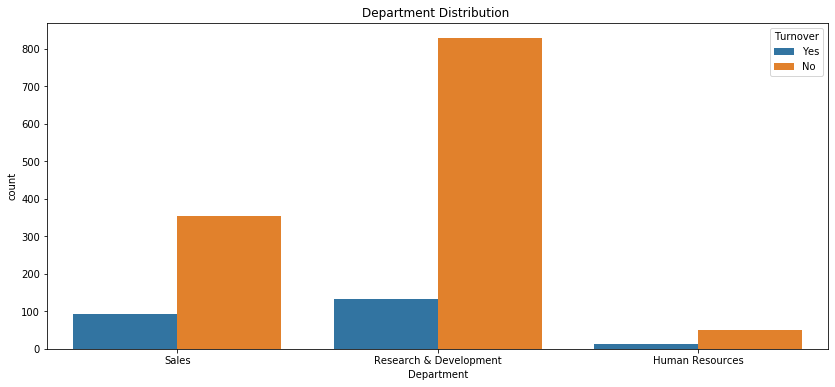

In [8]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Department", hue="Turnover", data=df)
plt.title(f'Department Distribution ')
plt.show()

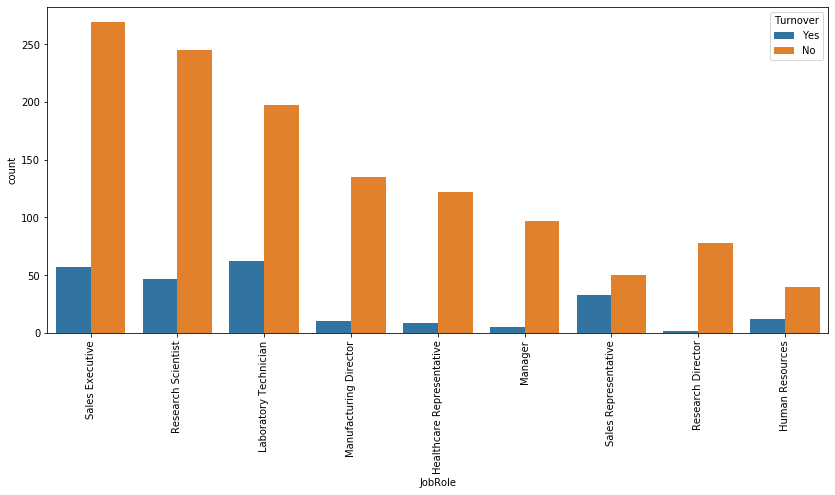

In [9]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="JobRole", hue="Turnover", data=df)

# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

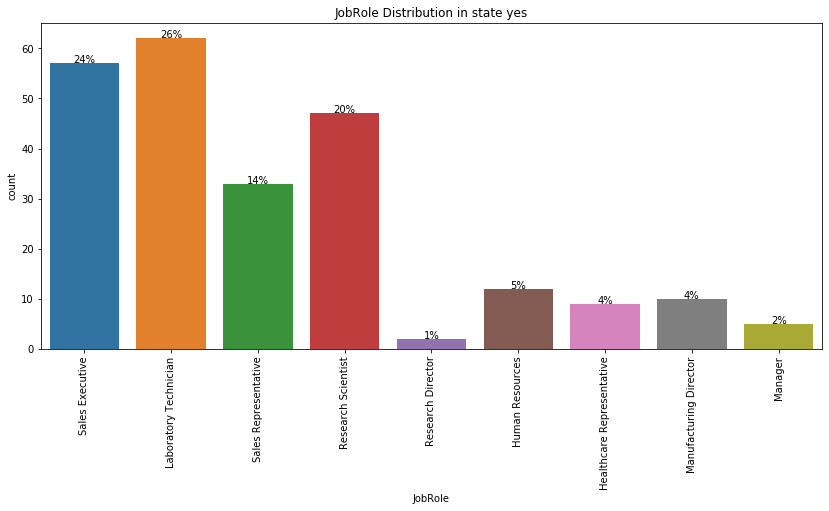

In [10]:
filtered_df = df[(df['Turnover'] == "Yes")]

if filtered_df.empty:
    print("no")
else:
    f, ax = plt.subplots(figsize=(14, 6))
    ax = sns.countplot(x="JobRole", data=filtered_df)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    total = float(len(filtered_df))  # Total number of samples
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}%'.format((height / total) * 100), ha="center")

    plt.title(f'JobRole Distribution in state yes')
    plt.show()

# Data Preparation

## Data cleaning

In [11]:
#Since turnover is the targe column, turn it into intergers so that we would train the model accordingly
df['Turnover'] = df['Turnover'].map({'Yes': 1, 'No': 0})

In [12]:
df.head()

,EMPLOYEE_ID,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [13]:
#calculate the min,max and mean
df.describe()

,EMPLOYEE_ID,Age,Turnover,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Remove outliers

In [14]:
#compile the numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

EMPLOYEE_ID
Before Skew : 0.0


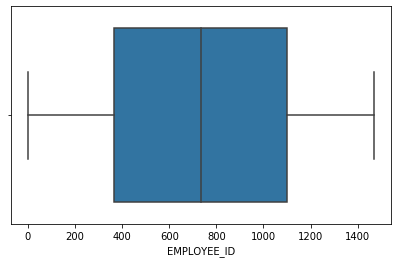

Age
Before Skew : 0.41


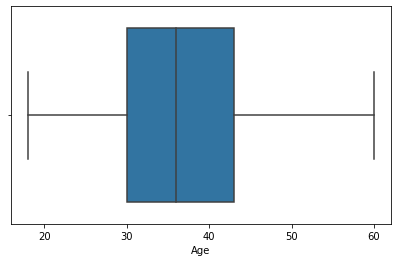

Turnover
Before Skew : 1.84


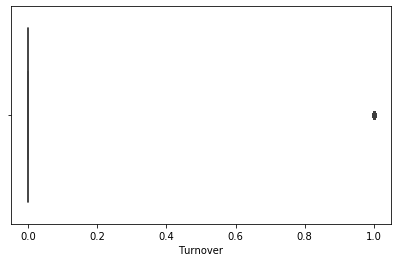

DailyRate
Before Skew : -0.0


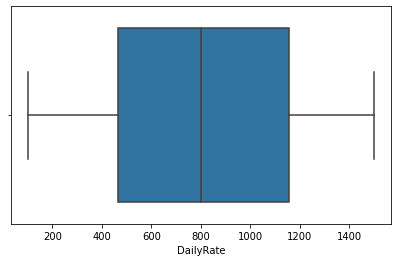

DistanceFromHome
Before Skew : 0.96


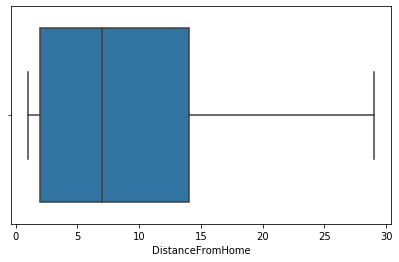

Education
Before Skew : -0.29


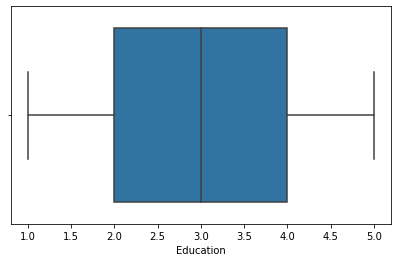

EnvironmentSatisfaction
Before Skew : -0.32


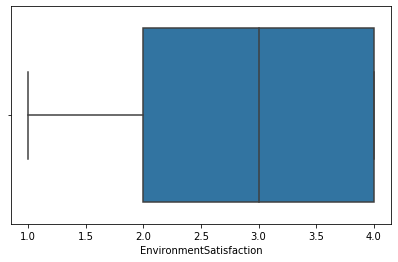

HourlyRate
Before Skew : -0.03


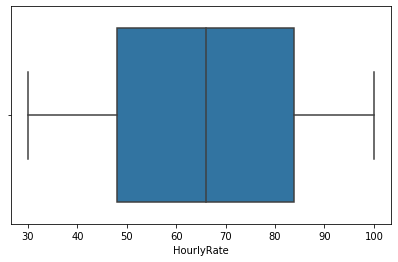

JobInvolvement
Before Skew : -0.5


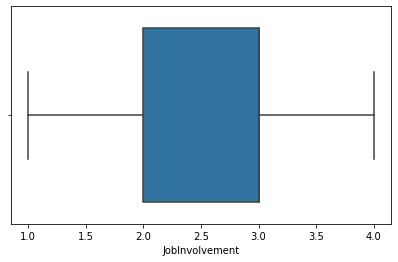

JobLevel
Before Skew : 1.03


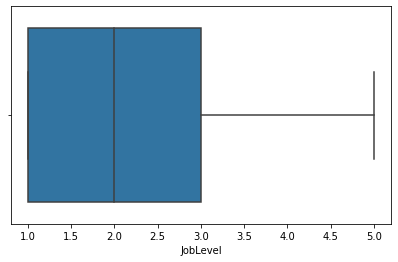

JobSatisfaction
Before Skew : -0.33


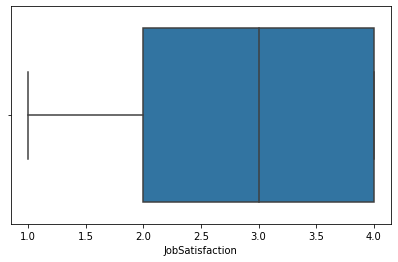

MonthlyIncome
Before Skew : 1.37


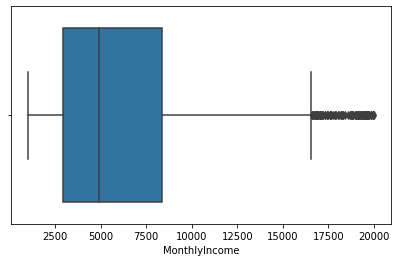

MonthlyRate
Before Skew : 0.02


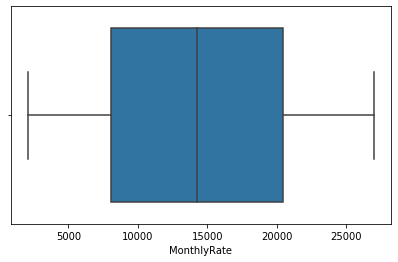

NumCompaniesWorked
Before Skew : 1.03


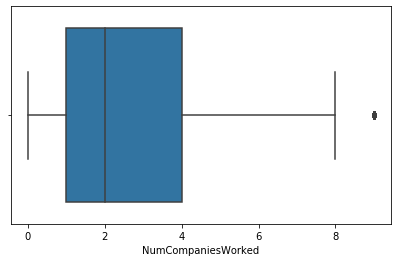

PercentSalaryHike
Before Skew : 0.82


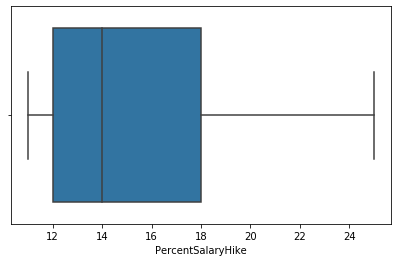

PerformanceRating
Before Skew : 1.92


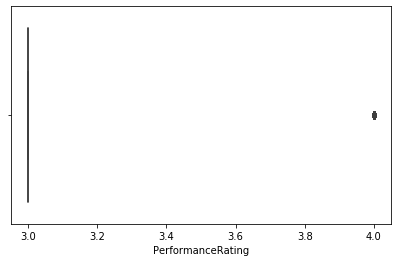

RelationshipSatisfaction
Before Skew : -0.3


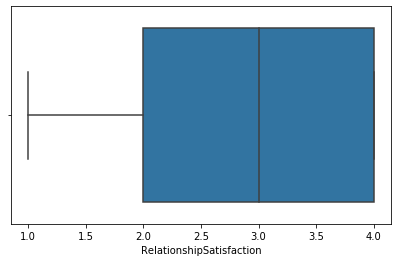

StandardHours
Before Skew : 0


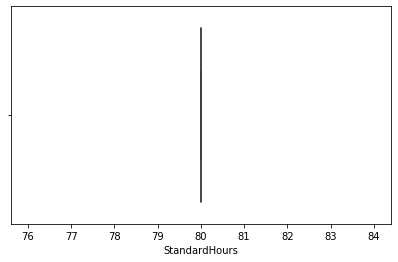

StockOptionLevel
Before Skew : 0.97


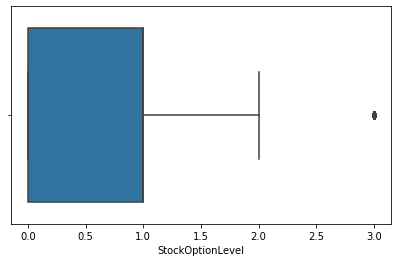

TotalWorkingYears
Before Skew : 1.12


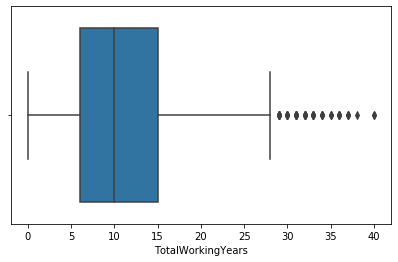

TrainingTimesLastYear
Before Skew : 0.55


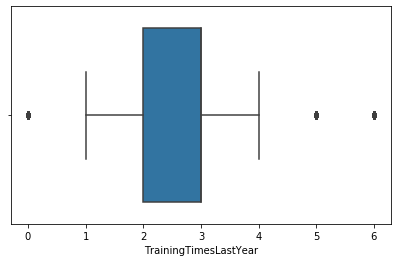

WorkLifeBalance
Before Skew : -0.55


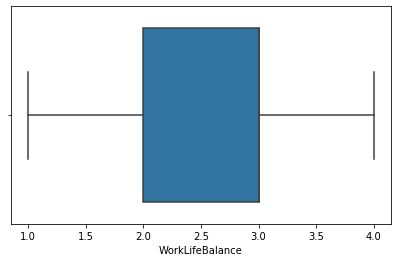

YearsAtCompany
Before Skew : 1.76


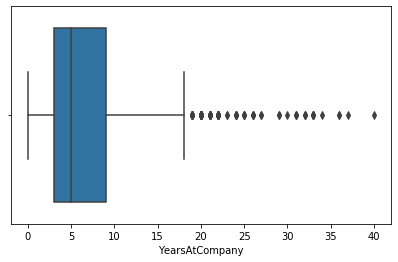

YearsInCurrentRole
Before Skew : 0.92


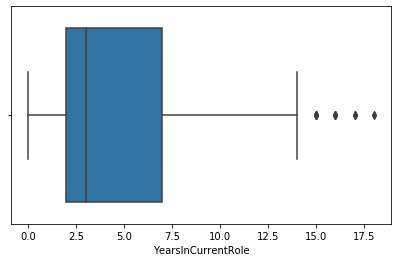

YearsSinceLastPromotion
Before Skew : 1.98


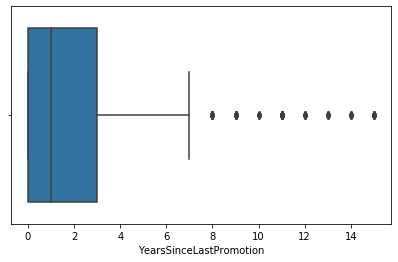

YearsWithCurrManager
Before Skew : 0.83


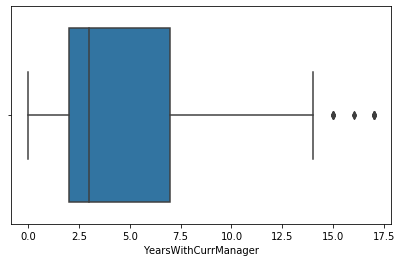

In [15]:
#display the boxplot to see columns that has outliers
for col in num_cols:
    print(col)
    print('Before Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
import numpy as np

def iqr_capping(df, exclude_col=None):

    """

    Caps outliers in numerical columns using the IQR method, excluding a specified column.

    Parameters:

    - df: DataFrame to process.

    - exclude_col: Column to exclude from capping (e.g., 'Turnover').

    Returns:

    - df: DataFrame with capped values.

    """

    for col in df.columns:

        # Skip non-numeric columns and the excluded column

        if df[col].dtype != 'object' and col != exclude_col:

            q1 = df[col].quantile(0.25)  # First quartile

            q3 = df[col].quantile(0.75)  # Third quartile

            iqr = q3 - q1  # Interquartile range

            # Define whiskers

            upper_whisker = q3 + (1.5 * iqr)

            lower_whisker = q1 - (1.5 * iqr)

            # Cap values beyond whiskers

            df[col] = np.where(

                df[col] > upper_whisker, upper_whisker,

                np.where(df[col] < lower_whisker, lower_whisker, df[col])

            )

    return df


# Exclude the 'Turnover' column from outlier capping, because it the

final_df = iqr_capping(df, exclude_col='Turnover') 

EMPLOYEE_ID
After Skew : 0.0


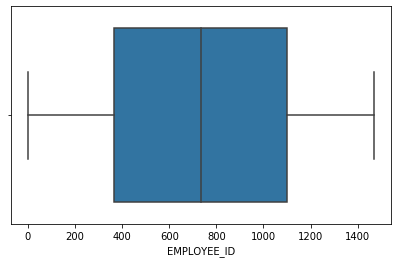

Age
After Skew : 0.41


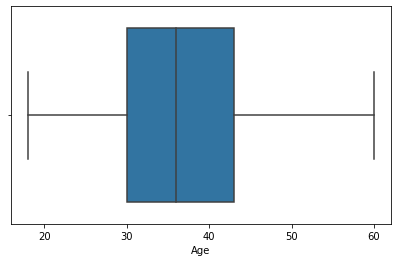

Turnover
After Skew : 1.84


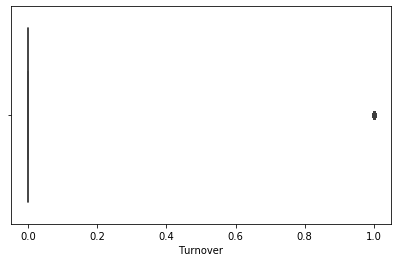

DailyRate
After Skew : -0.0


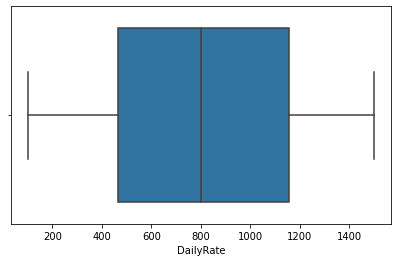

DistanceFromHome
After Skew : 0.96


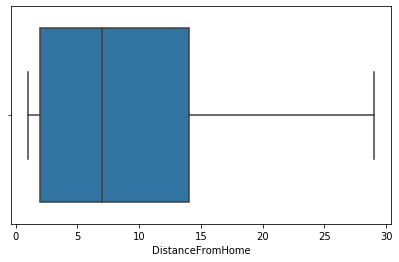

Education
After Skew : -0.29


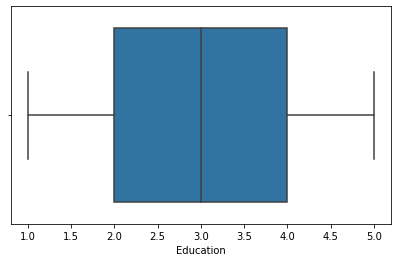

EnvironmentSatisfaction
After Skew : -0.32


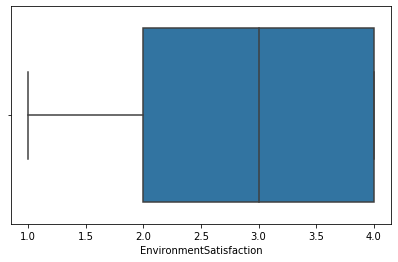

HourlyRate
After Skew : -0.03


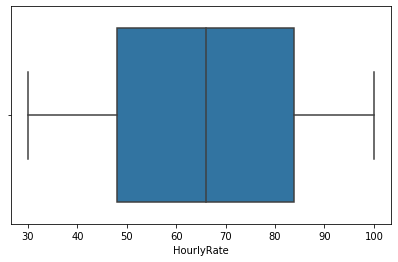

JobInvolvement
After Skew : -0.5


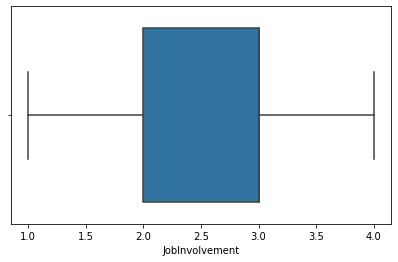

JobLevel
After Skew : 1.03


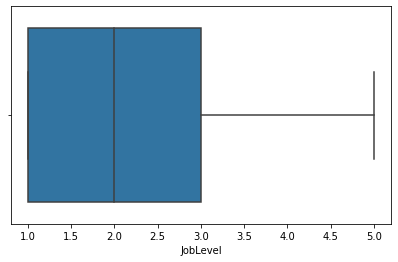

JobSatisfaction
After Skew : -0.33


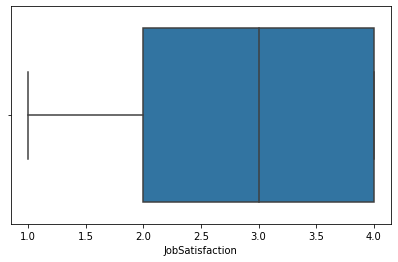

MonthlyIncome
After Skew : 1.17


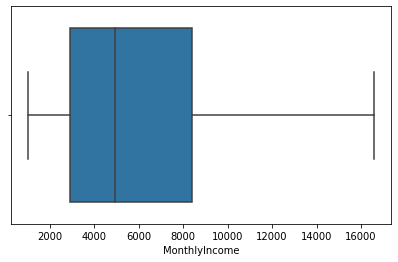

MonthlyRate
After Skew : 0.02


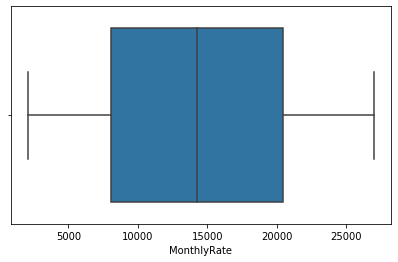

NumCompaniesWorked
After Skew : 0.97


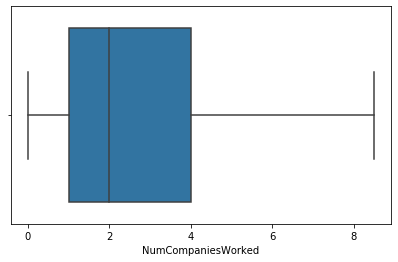

PercentSalaryHike
After Skew : 0.82


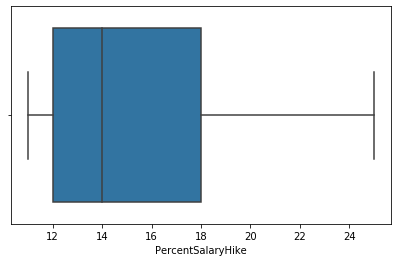

PerformanceRating
After Skew : 0


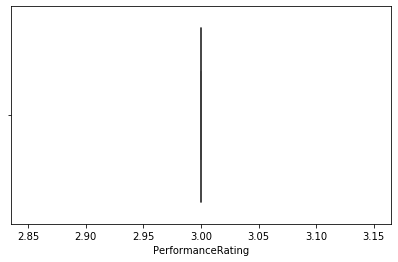

RelationshipSatisfaction
After Skew : -0.3


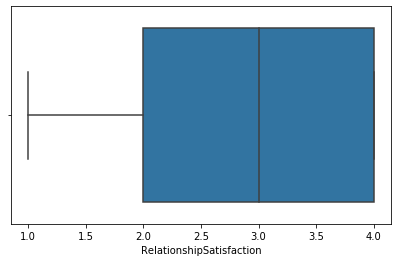

StandardHours
After Skew : 0


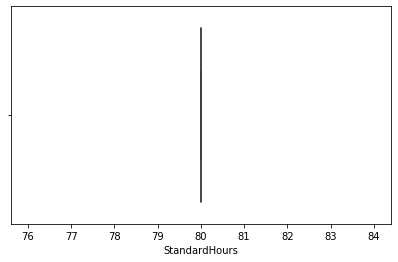

StockOptionLevel
After Skew : 0.66


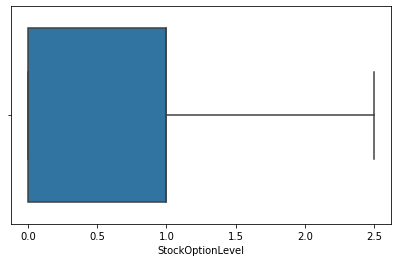

TotalWorkingYears
After Skew : 0.86


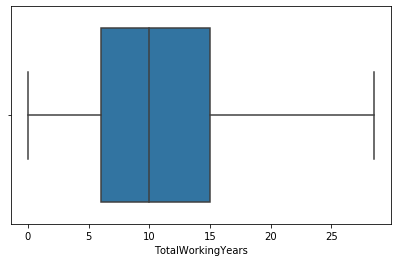

TrainingTimesLastYear
After Skew : 0.12


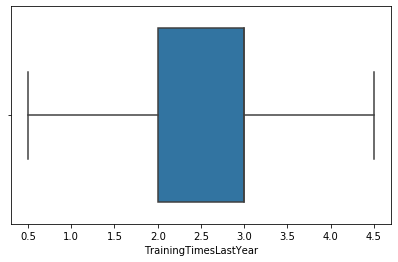

WorkLifeBalance
After Skew : -0.55


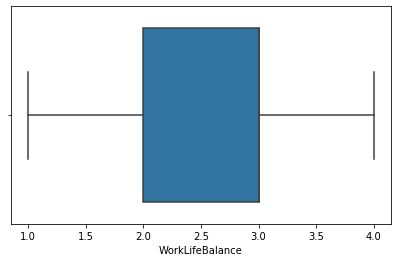

YearsAtCompany
After Skew : 0.9


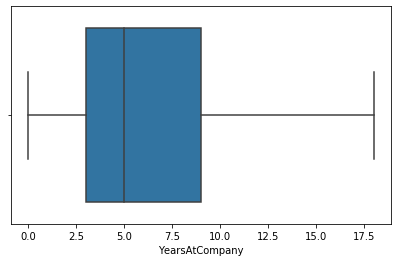

YearsInCurrentRole
After Skew : 0.8


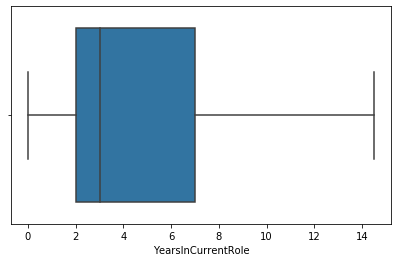

YearsSinceLastPromotion
After Skew : 1.26


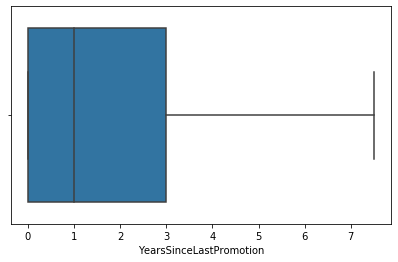

YearsWithCurrManager
After Skew : 0.74


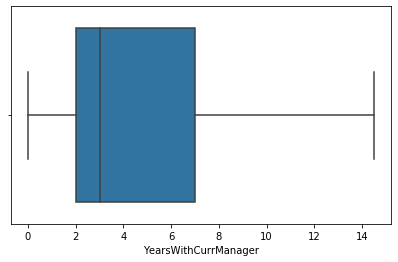

In [17]:
for col in num_cols:
    print(col)
    print('After Skew :', round(final_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=final_df[col])
    plt.show()

In [18]:
# Use label encoder to give categorical columns interger values  
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
final_df['BusinessTravel']=le.fit_transform(final_df['BusinessTravel'])
final_df['Department']=le.fit_transform(final_df['Department'])
final_df['EducationField']=le.fit_transform(final_df['EducationField'])
final_df['Gender']=le.fit_transform(final_df['Gender'])
final_df['JobRole']=le.fit_transform(final_df['JobRole'])
final_df['MaritalStatus']=le.fit_transform(final_df['MaritalStatus'])
final_df['OverTime']=le.fit_transform(final_df['OverTime'])

In [19]:
#drop columns that I will not need
drop = ['Over18','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear']
final_df.drop(columns=drop, inplace=True)

## Analyze

#### Selection

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Ensure y is a Series and properly extracted
y = final_df['Turnover']  
X = final_df.drop(columns=['Turnover'])  

# Check class distribution
print(y.value_counts())

# Handle imbalance if necessary
model = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit the model
rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)


0    1233
1     237
Name: Turnover, dtype: int64
[False False False False  True False False False  True  True False  True
  True False  True  True False False False  True False False False False
  True False False  True False]
[19 12 13 17  1 11 14  5  1  1 15  1  1  8  1  1 18 20  4  1 10 16  3  9
  1  7  6  1  2]


### This is to make sure that the selected inputs do not have any correlation, to avoid overfitting

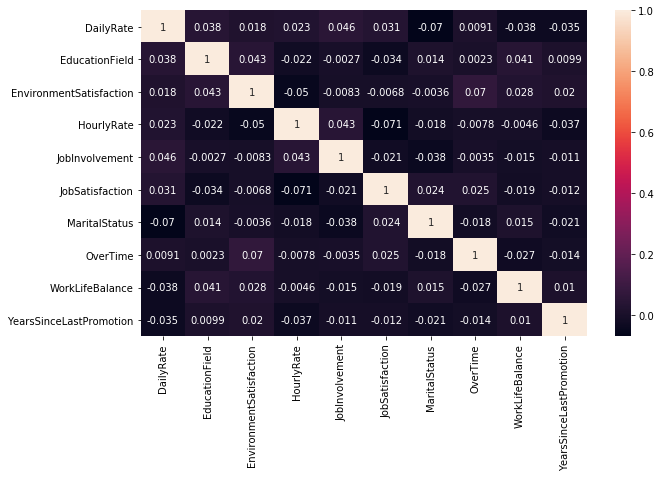

In [21]:
ten_features =final_df[['DailyRate','EducationField','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','WorkLifeBalance','YearsSinceLastPromotion']]
plt.figure(figsize=(10,6))
correlation_mat = ten_features.corr()
ax= sns.heatmap(correlation_mat, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Feature importance

### Question 3: What are the factors contributing to employees leaving or staying?

Feature ranking:
1. feature DailyRate (0.215965)
2. feature HourlyRate (0.193187)
3. feature YearsSinceLastPromotion (0.097014)
4. feature EducationField (0.080195)
5. feature JobInvolvement (0.076391)
6. feature EnvironmentSatisfaction (0.074898)
7. feature JobSatisfaction (0.073273)
8. feature OverTime (0.068936)
9. feature WorkLifeBalance (0.062652)
10. feature MaritalStatus (0.057487)


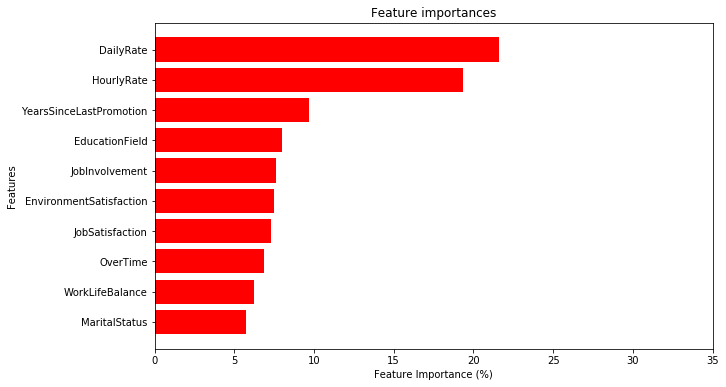

In [22]:
X = ten_features.iloc[:,0:] # Features
y = final_df.loc[:,'Turnover']  # Target variable

# Create a random forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances horizontally starting from the most important feature
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), feature_importances[indices][::-1], color="r", align="center")
plt.yticks(range(X.shape[1]), X.columns[indices][::-1])
plt.xlabel('Feature Importance')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['0', '5', '10', '15', '20', '25', '30', '35'])
plt.show()

## Model

In [23]:
#from sklearn.cross_validation import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with a lower number of trees
rf = RandomForestClassifier(n_estimators=5,min_samples_leaf=5)
# Train the random forest model on your training data
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Results

In [25]:
y_pred= rf.predict(X_test)
from sklearn.metrics import classification_report,balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

class_report_train = classification_report(y_test, rf.predict(X_test))
#print (rf.score(x_train, y_train), '- Train model score')
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))), '\n\n')
print(class_report_train)

Random Forest Accuracy: 0.84 


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.50      0.04      0.08        70

    accuracy                           0.84       441
   macro avg       0.67      0.52      0.50       441
weighted avg       0.79      0.84      0.78       441



# Evaluate Results

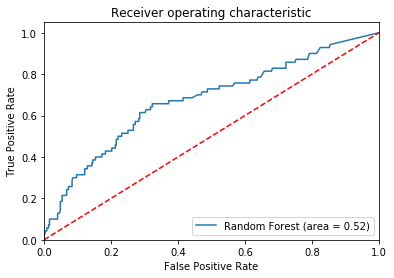

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## The relationship between a model's predictions and a subset of its features.

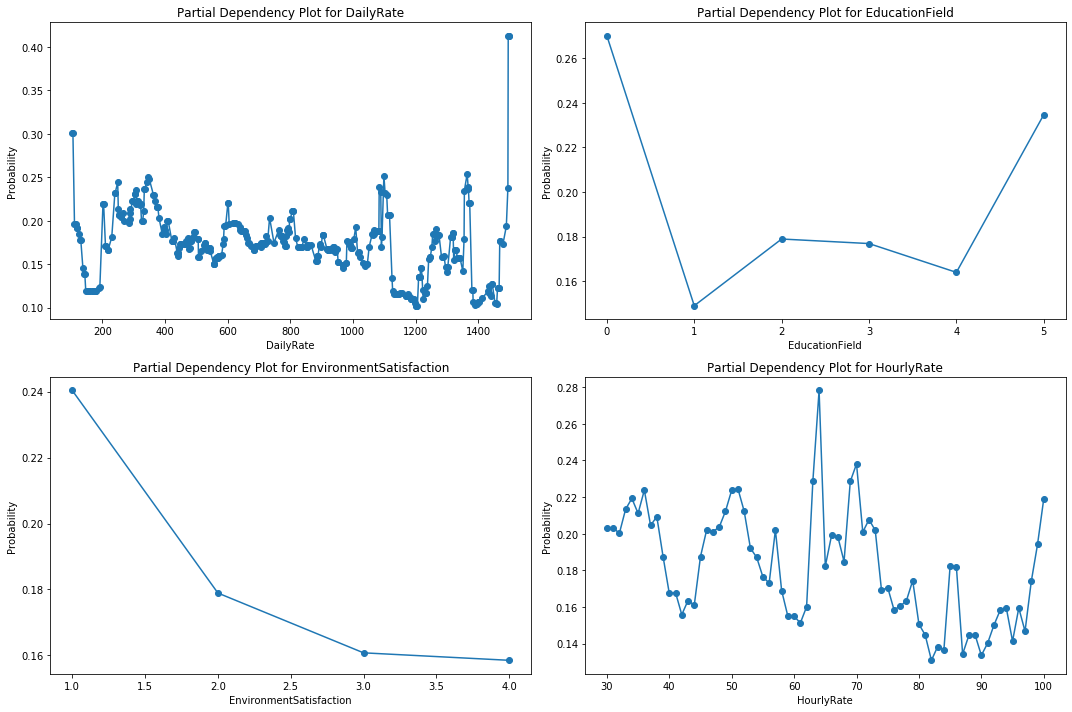

Turnover                   1.000000
EducationField             0.026846
HourlyRate                -0.006846
YearsSinceLastPromotion   -0.037486
DailyRate                 -0.056652
EnvironmentSatisfaction   -0.103369
Name: Turnover, dtype: float64


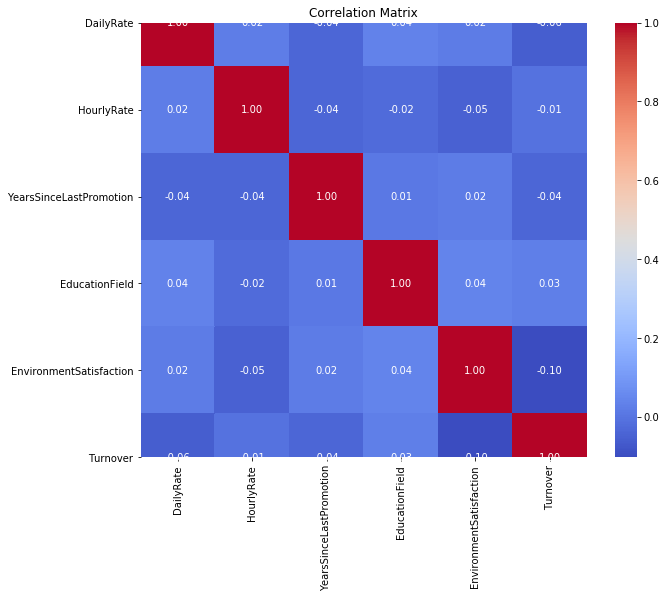

In [27]:
# Step 1: Load data
Correlation = final_df[['DailyRate','HourlyRate','YearsSinceLastPromotion','EducationField','EnvironmentSatisfaction','Turnover']]
data = Correlation  # Corrected variable name

# Step 3: Train-test split
X = data.drop('Turnover', axis=1)  # Use original data without encoding
y = data['Turnover']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a predictive model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Step 5: Generate PDPs manually
def partial_dependency(model, X, feature):
    X_temp = X.copy()
    values = np.unique(X_temp[feature])
    partial_dependence = np.zeros(len(values))
    for i, value in enumerate(values):
        X_temp[feature] = value
        partial_dependence[i] = model.predict_proba(X_temp)[:, 1].mean()
    return values, partial_dependence

# Variables for PDPs (excluding label-encoded variables)
variables_of_interest = ['DailyRate','EducationField','EnvironmentSatisfaction','HourlyRate']

# Plot PDPs
num_plots = len(variables_of_interest)
num_cols = 2  # Adjust according to the desired number of columns
num_rows = (num_plots - 1) // num_cols + 1
plt.figure(figsize=(15, 5 * num_rows))
for i, var in enumerate(variables_of_interest):
    plt.subplot(num_rows, num_cols, i + 1)
    values, pdp_values = partial_dependency(model, x_test, var)
    plt.plot(values, pdp_values, marker='o')
    plt.title(f'Partial Dependency Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

# Step 6: Correlation analysis (excluding label-encoded variables)
correlation_matrix = Correlation.corr()  # Use original data without encoding
correlation_with_target = correlation_matrix['Turnover'].sort_values(ascending=False)
print(correlation_with_target)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()